# Getting Fuel Mix Data for ISONE

This notebook demonstrates how we can extract aggregated fuel mix data from ISONE using `gridstatus` to:
* access EIA's APIv2
* access ISONE's API


## Import necessary packages / libraries

* `numpy` is a standard mathematical library for Python.
* `matplotlib` is one of the most widely used plotting tools for research.
* `pandas` is a Python library for data analysis.
* `gridstatus` is a package for scraping energy data from various ISOs and EIA.
* `dotenv` is a tool for loading in sensitive data stored in a `.env` file, such as private API keys.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from gridstatus import EIA
from dotenv import load_dotenv
import UCSmpl

pd.options.display.max_columns = None

# load the environment variables
load_dotenv()

True

In [2]:
# initialize the EIA api
eia = EIA()

In [3]:
# list the facets for EIA's fuel-type-data
facets = eia.list_facets('electricity/rto/fuel-type-data')

List the available respondents for EIA's dataset

In [4]:
respondents = pd.DataFrame(facets['respondent']['facets'])
for i,n in respondents.values:
    print(i,n)

TEX Texas
NYIS New York Independent System Operator
SE Southeast
CENT Central
SOCO Southern Company Services, Inc. - Trans
CISO California Independent System Operator
AEC PowerSouth Energy Cooperative
PSCO Public Service Company of Colorado
PACE PacifiCorp East
DUK Duke Energy Carolinas
TVA Tennessee Valley Authority
CPLW Duke Energy Progress West
GRIF Griffith Energy, LLC
GRID Gridforce Energy Management, LLC
SCL Seattle City Light
GCPD Public Utility District No. 2 of Grant County, Washington
NSB Utilities Commission of New Smyrna Beach
OVEC Ohio Valley Electric Corporation
PGE Portland General Electric Company
PACW PacifiCorp West
NEVP Nevada Power Company
WALC Western Area Power Administration - Desert Southwest Region
CPLE Duke Energy Progress East
TPWR City of Tacoma, Department of Public Utilities, Light Division
SW Southwest
SPA Southwestern Power Administration
BANC Balancing Authority of Northern California
DEAA Arlington Valley, LLC
HST City of Homestead
NE New England
MISO 

In [5]:
len(respondents)

81

In [6]:
np.sort(respondents.values[:,1])

array(['Alcoa Power Generating, Inc. - Yadkin Division',
       'Arizona Public Service Company', 'Arlington Valley, LLC',
       'Associated Electric Cooperative, Inc.',
       'Avangrid Renewables, LLC', 'Avista Corporation',
       'Balancing Authority of Northern California',
       'Bonneville Power Administration', 'California',
       'California Independent System Operator', 'Carolinas', 'Central',
       'City of Homestead',
       'City of Tacoma, Department of Public Utilities, Light Division',
       'City of Tallahassee', 'Dominion Energy South Carolina, Inc.',
       'Duke Energy Carolinas', 'Duke Energy Florida, Inc.',
       'Duke Energy Progress East', 'Duke Energy Progress West',
       'El Paso Electric Company', 'Electric Energy, Inc.',
       'Electric Reliability Council of Texas, Inc.', 'Florida',
       'Florida Municipal Power Pool', 'Florida Power & Light Co.',
       'Gainesville Regional Utilities', 'GridLiance',
       'Gridforce Energy Management, LLC', 'G

## Download the data from EIA

If you are unsure of what arguments to pass to a function, you can run either in a Jupyter notebook or IPython terminal

* `a_confusing_function?`
* `help(a_confusing_function)`

both of these commands will display the documentation for the function, which should include information about the arguments and their datatypes.

In [7]:
eia.get_dataset?

Signature:
eia.get_dataset(
    dataset,
    start,
    end,
    frequency='hourly',
    facets=None,
    n_workers=1,
    verbose=False,
)
Docstring:
Get data from a dataset

Currently supports the following datasets:

- "electricity/rto/interchange-data"
- "electricity/rto/region-data"
- "electricity/rto/region-sub-ba-data"
- "electricity/rto/fuel-type-data"

Args:
    dataset (str): Dataset path
    start (str or pd.Timestamp): Start date
    end (str or pd.Timestamp): End date
    frequency (str): Specifies the data frequency.
        Accepts [`hourly`, `local-hourly`]. Where `hourly` is refers
        to the UTC time and local-hourly is the local time.
    Default is `hourly`.
    facets (dict, optional): Facets to
        add to the request header. Defaults to None.
    n_workers (int, optional): Number of
        workers to use for fetching data. Defaults to 1.
    verbose (bool, optional): Whether
        to print progress. Defaults to False.

Returns:
    pd.DataFrame: Datafra

In [8]:
isone_fuel_mix_data = eia.get_dataset("electricity/rto/fuel-type-data",
                                    start='2024-04-04',
                                    end='2024-04-06',
                                    facets={'respondent':'ISNE'},
                                    frequency='hourly',
                                    n_workers=4,
                                    verbose=True)

Fetching data from https://api.eia.gov/v2/electricity/rto/fuel-type-data/data/
Params: {'start': '2024-04-04T00', 'end': '2024-04-06T00', 'frequency': 'hourly', 'data': ['value'], 'facets': {'respondent': ['ISNE']}, 'offset': 0, 'length': 5000, 'sort': [{'column': 'period', 'direction': 'asc'}, {'column': 'respondent', 'direction': 'asc'}, {'column': 'fueltype', 'direction': 'asc'}]}
Concurrent workers: 4
Total records: 392
Total pages: 1
Fetching data:


### Check the data

We can check the first few rows of data using the `pandas.DataFrame` method `.head()`.

In [9]:
isone_fuel_mix_data.head()

,Interval Start,Interval End,Respondent,Respondent Name,Coal,Hydro,Natural gas,Nuclear,Other,Petroleum,Solar,Wind
0,2024-04-03 23:00:00+00:00,2024-04-04 00:00:00+00:00,ISNE,ISO New England,3.0,1693.0,6770.0,3358.0,498.0,0.0,0.0,948.0
1,2024-04-04 00:00:00+00:00,2024-04-04 01:00:00+00:00,ISNE,ISO New England,3.0,1694.0,6625.0,3342.0,492.0,0.0,0.0,1036.0
2,2024-04-04 01:00:00+00:00,2024-04-04 02:00:00+00:00,ISNE,ISO New England,1.0,1376.0,6260.0,3344.0,487.0,0.0,0.0,1099.0
3,2024-04-04 02:00:00+00:00,2024-04-04 03:00:00+00:00,ISNE,ISO New England,2.0,1365.0,5853.0,3343.0,499.0,0.0,0.0,1072.0
4,2024-04-04 03:00:00+00:00,2024-04-04 04:00:00+00:00,ISNE,ISO New England,1.0,1217.0,5506.0,3344.0,485.0,0.0,0.0,1095.0


### Clean up the data

After inspecting the dataset, we can see that there are some columns we don't really care about, and two timestamp columns, both of which have UTC shift (`+00:00`). Let's clean it up.

In [10]:
# remove the UTC shift
isone_fuel_mix_data['Interval End'] = isone_fuel_mix_data['Interval End'].dt.tz_convert('US/Eastern')

# give the dataframe a datetime index and drop erroneous columns.
isone_fuel_mix_data = isone_fuel_mix_data.set_index("Interval End", drop=True)\
                                         .drop(columns=['Respondent Name','Interval Start'])
                                         
# if we don't want information about the respondent and just the generation                                         
fuel_mix = isone_fuel_mix_data.iloc[:,1:]

In [11]:
fuel_mix.head()

,Coal,Hydro,Natural gas,Nuclear,Other,Petroleum,Solar,Wind
Interval End,,,,,,,,
2024-04-03 20:00:00-04:00,3.0,1693.0,6770.0,3358.0,498.0,0.0,0.0,948.0
2024-04-03 21:00:00-04:00,3.0,1694.0,6625.0,3342.0,492.0,0.0,0.0,1036.0
2024-04-03 22:00:00-04:00,1.0,1376.0,6260.0,3344.0,487.0,0.0,0.0,1099.0
2024-04-03 23:00:00-04:00,2.0,1365.0,5853.0,3343.0,499.0,0.0,0.0,1072.0
2024-04-04 00:00:00-04:00,1.0,1217.0,5506.0,3344.0,485.0,0.0,0.0,1095.0


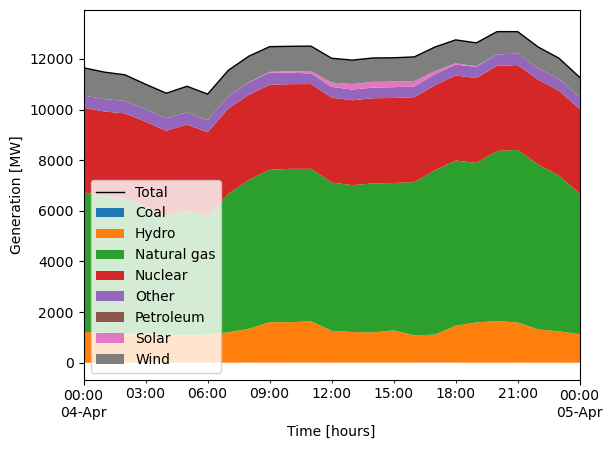

In [12]:
fig, ax = plt.subplots()
fuel_mix.sum(axis=1).plot(ax=ax, color='k',linestyle='-', lw=1, label='Total')
total = np.zeros(len(fuel_mix))
t = fuel_mix.index
for i, col in enumerate(fuel_mix.columns):
    gen = fuel_mix[col].values
    ax.fill_between(x=t, y1=total, y2=total+gen, label=col)
    total += gen
ax.legend()
ax.set_ylabel("Generation [MW]")
ax.set_xlabel("Time [hours]")

start = pd.Timestamp('2024-04-04')
end = pd.Timestamp('2024-04-05')
ax.set_xlim(start, end)
plt.show()

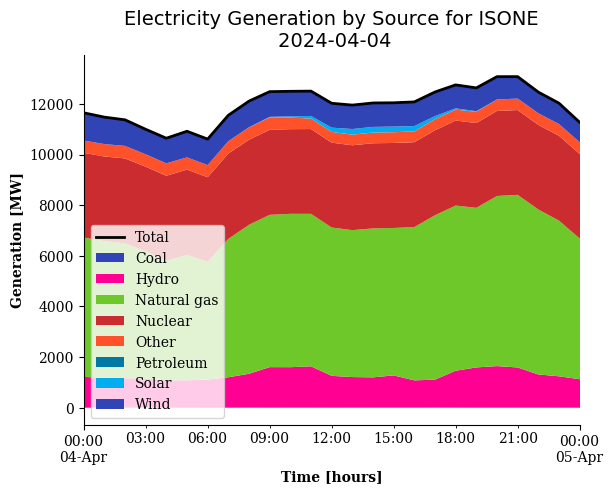

CPU times: total: 266 ms
Wall time: 271 ms


In [34]:
%%time
with plt.style.context("ucs_light"):
    fig, ax = plt.subplots()
    fuel_mix.sum(axis=1).plot(ax=ax, color='k',linestyle='-', lw=2, label='Total')
    total = np.zeros(len(fuel_mix))
    t = fuel_mix.index
    for i, col in enumerate(fuel_mix.columns):
        gen = fuel_mix[col].values
        ax.fill_between(x=t, y1=total, y2=total+gen, label=col)
        total += gen
    ax.legend()
    ax.set_ylabel("Generation [MW]")
    ax.set_xlabel("Time [hours]")

    start = pd.Timestamp('2024-04-04')
    end = pd.Timestamp('2024-04-05')
    ax.set_xlim(start, end)
    ax.set_title(f'Electricity Generation by Source for ISONE\n {start.strftime("%Y-%m-%d")}', 
                 fontdict=dict(family="sans serif", fontsize=14))
    plt.show()

## Get Data from ISONE directly

In [30]:
from gridstatus import ISONE

In [31]:
# initialize the ISONE API object
isone = ISONE()

In [32]:
isne_fuel = isone.get_fuel_mix('2024-04-04', verbose=True)

Loading data from https://www.iso-ne.com/transform/csv/genfuelmix?start=20240404


In [33]:
isne_fuel.head()

,Time,Coal,Hydro,Landfill Gas,Natural Gas,Nuclear,Other,Refuse,Solar,Wind,Wood
0,2024-04-04 00:03:37-04:00,0.0,1202.0,37.0,5313.0,3362.0,33.0,267.0,0.0,1080.0,179.0
1,2024-04-04 00:13:37-04:00,0.0,1203.0,37.0,5594.0,3358.0,0.0,266.0,0.0,1079.0,182.0
2,2024-04-04 00:16:55-04:00,0.0,1204.0,37.0,5632.0,3362.0,0.0,268.0,0.0,1070.0,183.0
3,2024-04-04 00:23:48-04:00,2.0,1203.0,37.0,5636.0,3355.0,0.0,263.0,0.0,1066.0,182.0
4,2024-04-04 00:33:29-04:00,2.0,1203.0,37.0,5636.0,3355.0,0.0,263.0,0.0,1066.0,182.0


### Clean up the data

This time we need to do some slightly different data cleaning. We still need to make the index a timestamp instead of numerical, but now we can see that the data is gathered at frequent (~5 minute) but irregular intervals.

So let's resample the data to make it a consistent hourly dataset. The units are in MWh, so we don't want to `sum` the data, we want to take the `mean` of the data. 

In [34]:
# isne_fuel['Time'] = isne_fuel['Time'].dt.tz_localize(None)
isne_fuel = isne_fuel.set_index('Time', drop=True).resample('h').mean()

In [35]:
isne_fuel.head()

,Coal,Hydro,Landfill Gas,Natural Gas,Nuclear,Other,Refuse,Solar,Wind,Wood
Time,,,,,,,,,,
2024-04-04 00:00:00-04:00,0.875000,1189.750000,37.000,5467.250000,3358.000000,5.500000,266.500000,0.0,1067.875000,182.250000
2024-04-04 01:00:00-04:00,3.400000,1161.200000,36.100,5343.600000,3360.400000,6.000000,269.600000,0.0,1030.000000,180.700000
2024-04-04 02:00:00-04:00,3.800000,1158.600000,36.000,5042.900000,3362.100000,3.700000,270.200000,0.0,994.100000,179.700000
2024-04-04 03:00:00-04:00,1.909091,1076.545455,36.000,4726.636364,3363.545455,1.363636,272.090909,0.0,993.363636,181.272727
2024-04-04 04:00:00-04:00,3.250000,1080.750000,35.125,4959.750000,3361.625000,3.375000,270.750000,0.0,1032.000000,170.625000


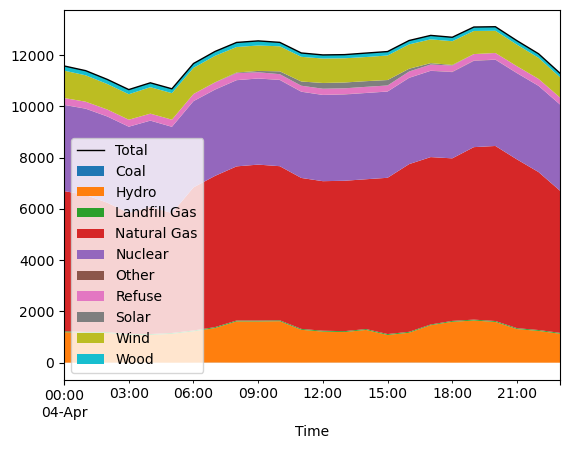

CPU times: total: 219 ms
Wall time: 225 ms


In [36]:
%%time
fig, ax = plt.subplots()
isne_fuel.sum(axis=1).plot(ax=ax, color='k',linestyle='-', lw=1, label='Total')
total = np.zeros(len(isne_fuel))
t = isne_fuel.index
for i, col in enumerate(isne_fuel.columns):
    gen = isne_fuel[col].values
    ax.fill_between(x=t, y1=total, y2=total+gen, label=col)
    total += gen
ax.legend()
plt.show()